## 1. Importing the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the dataset into a Pandas dataframe
df = pd.read_excel('amazon-bestsellers-books-2009-2022.xlsx')
df

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,"Act Like a Lady, Think Like a Man: What Men Re...",Steve Harvey,4.6,5013,17,2009,Non Fiction
1,Arguing with Idiots: How to Stop Small Minds a...,Glenn Beck,4.6,798,5,2009,Non Fiction
2,"Breaking Dawn (The Twilight Saga, Book 4)",Stephenie Meyer,4.6,9769,13,2009,Fiction
3,Crazy Love: Overwhelmed by a Relentless God,Francis Chan,4.7,1542,14,2009,Non Fiction
4,Dead And Gone: A Sookie Stackhouse Novel (Sook...,Charlaine Harris,4.6,1541,4,2009,Fiction
...,...,...,...,...,...,...,...
695,The Wonderful Things You Will Be,Emily Winfield Martin,4.9,20920,9,2022,Fiction
696,Ugly Love: A Novel,Colleen Hoover,4.7,33929,10,2022,Fiction
697,Verity,Colleen Hoover,4.6,71826,11,2022,Fiction
698,What to Expect When You're Expecting,Heidi Murkoff,4.8,27052,13,2022,Non Fiction


## 2. Preparing and cleaning
Here I'll explore the dataset and clean it before doing the actual analysis.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         700 non-null    object 
 1   Author       700 non-null    object 
 2   User Rating  700 non-null    float64
 3   Reviews      700 non-null    int64  
 4   Price        700 non-null    int64  
 5   Year         700 non-null    int64  
 6   Genre        700 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 38.4+ KB


There are no empty values and 700 entries as expected.

### Double-checking for null values

In [4]:
df.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

### Distinct books

In [5]:
# let's count the unique book titles
len(df.Name.unique())

441

There are 441 unique books but 700 books in the dataset. This is because some titles made it to the bestselling ranking several years.

### Renaming the columns

To avoid spaces between the columns names:

In [6]:
df.columns = ['title', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
df.head()

,title,author,user_rating,reviews,price,year,genre
0,"Act Like a Lady, Think Like a Man: What Men Re...",Steve Harvey,4.6,5013,17,2009,Non Fiction
1,Arguing with Idiots: How to Stop Small Minds a...,Glenn Beck,4.6,798,5,2009,Non Fiction
2,"Breaking Dawn (The Twilight Saga, Book 4)",Stephenie Meyer,4.6,9769,13,2009,Fiction
3,Crazy Love: Overwhelmed by a Relentless God,Francis Chan,4.7,1542,14,2009,Non Fiction
4,Dead And Gone: A Sookie Stackhouse Novel (Sook...,Charlaine Harris,4.6,1541,4,2009,Fiction


### Descriptive statistics

In [7]:
df.describe()

,user_rating,reviews,price,year
count,700.000000,700.000000,700.000000,700.000000
mean,4.639857,19255.195714,12.700000,2015.500000
std,0.218586,23613.443875,9.915162,4.034011
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4987.250000,7.000000,2012.000000
50%,4.700000,10284.000000,11.000000,2015.500000
75%,4.800000,23358.000000,15.000000,2019.000000
max,4.900000,208917.000000,105.000000,2022.000000


We already know more facts about the data from this statistics, such as the average user rating (4.6 stars); the number of reviews (min = 27, max = 208,917); and so on.

### Estimated revenue
Revenue is not included in the original dataset. A way of estimating the sales a book is making on Amazon is by checking its Best Sellers Rank. This figure allows us to estimate the number of daily/monthly sales, but still, it is only an estimate of the sales at a given hour, and not an estimate of the sales over time.
Therefore, I'm just going to calculate a new column in the dataframe to estimate revenue = reviews * price. Just for the sake of comparison between books (the actual revenue may certainly be much higher than this).

In [8]:
df ['revenue_guesstimate'] = df.reviews * df.price
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   title                700 non-null    object 
 1   author               700 non-null    object 
 2   user_rating          700 non-null    float64
 3   reviews              700 non-null    int64  
 4   price                700 non-null    int64  
 5   year                 700 non-null    int64  
 6   genre                700 non-null    object 
 7   revenue_guesstimate  700 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 43.9+ KB


## 3. EDA

### Fiction VS Non fiction

In [9]:
# Fiction
no_fiction = len(df[df.genre == 'Fiction'])
print(no_fiction)

312


In [10]:
# Non Fiction
no_non_fiction = len(df[df.genre == 'Non Fiction'])
print(no_non_fiction)

388


In [11]:
dist_genre = df.genre.value_counts()
dist_genre

Non Fiction    388
Fiction        312
Name: genre, dtype: int64

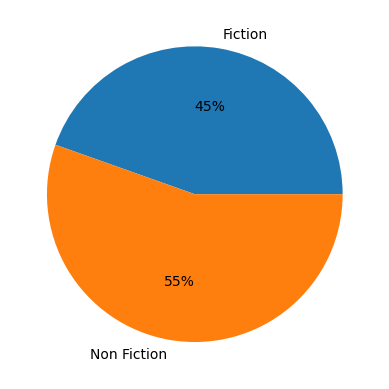

In [12]:
plt.pie([no_fiction, no_non_fiction], labels=['Fiction', 'Non Fiction'], autopct='%.0f%%');


### Relation between variables
Let's see whether there's a correlation between the data

In [13]:
 print(df.corr())

                     user_rating   reviews     price      year  \
user_rating             1.000000  0.080423 -0.157253  0.286601   
reviews                 0.080423  1.000000 -0.114554  0.494279   
price                  -0.157253 -0.114554  1.000000 -0.155266   
year                    0.286601  0.494279 -0.155266  1.000000   
revenue_guesstimate    -0.019308  0.880180  0.203550  0.377984   

                     revenue_guesstimate  
user_rating                    -0.019308  
reviews                         0.880180  
price                           0.203550  
year                            0.377984  
revenue_guesstimate             1.000000  


#### Let's create a plot for easy visualization of the correlation:

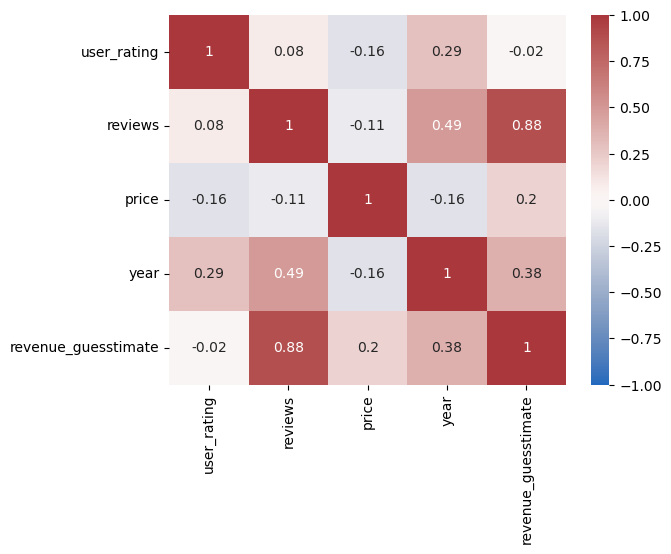

In [20]:
matrix = df.corr().round(2)
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()

The only strong correlation (0.88) appears to be between Reviews and Sales: the more sales, the more reviews a book gets. 

###  Number of years in which the authors were bestsellers

In [15]:
dist_authors = df.author.value_counts()
dist_authors.head(20)

Jeff Kinney                           14
Gary Chapman                          14
Suzanne Collins                       12
Rick Riordan                          11
American Psychological Association    11
Dr. Seuss                             10
Eric Carle                            10
Dav Pilkey                             9
Don Miguel Ruiz                        9
Gallup                                 9
Stephenie Meyer                        8
Rob Elliott                            8
Bill O'Reilly                          7
Dale Carnegie                          7
Stephen R. Covey                       7
Colleen Hoover                         6
J.K. Rowling                           6
Sarah Young                            6
Emily Winfield Martin                  6
Bill Martin Jr.                        6
Name: author, dtype: int64

###  Number of years in which the books were bestsellers

In [16]:
dist_titles = df.title.value_counts()
dist_titles.head(20)

Publication Manual of the American Psychological Association, 6th Edition                 10
The Very Hungry Caterpillar                                                               10
StrengthsFinder 2.0                                                                        9
The Four Agreements: A Practical Guide to Personal Freedom (A Toltec Wisdom Book)          9
Oh, the Places You'll Go!                                                                  8
The 5 Love Languages: The Secret to Love that Lasts                                        8
The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change               7
How to Win Friends & Influence People                                                      7
The Wonderful Things You Will Be                                                           6
Jesus Calling: Enjoying Peace in His Presence (with Scripture References)                  6
Giraffes Can't Dance                                                  

### The bestsellers that generate the most revenue
Again, this is an estimate and, more than likely, way below the actual revenue each author made.

In [17]:
revenue_df = df.groupby('title')['revenue_guesstimate'].max()
revenue_df = revenue_df.sort_values(ascending = False).head(15)
revenue_df

title
Where the Crawdads Sing                                                                                 2506980
Becoming                                                                                                2494107
The Silent Patient                                                                                      2050880
A Promised Land                                                                                         1937744
The Midnight Library: A Novel                                                                           1876082
The Girl on the Train                                                                                   1430028
The Alchemist                                                                                           1396161
The Four Winds: A Novel                                                                                 1355340
Midnight Sun                                                                                      

Text(0.5, 1.0, 'Revenue by book')

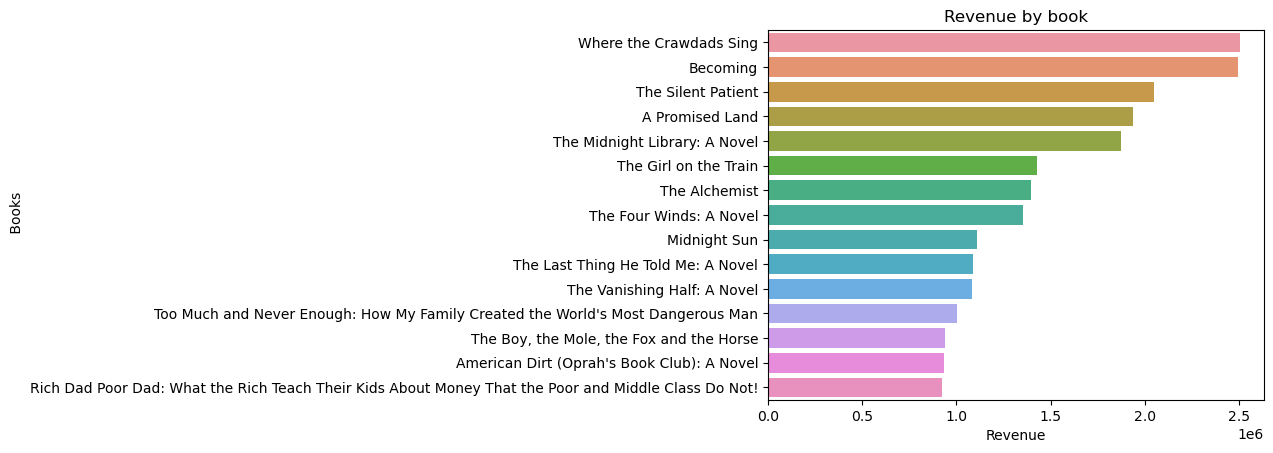

In [18]:
sns.barplot(x = revenue_df, y = revenue_df.index)
plt.xlabel('Revenue')
plt.ylabel(' Books')
plt.title(('Revenue by book'))


### Sales trend over time

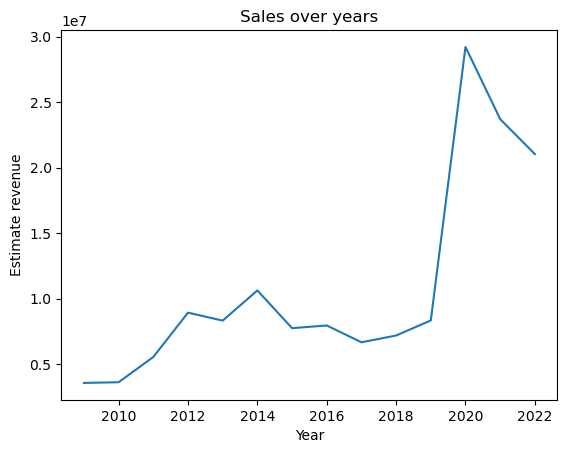

<Figure size 1500x1500 with 0 Axes>

In [19]:
sales_trend = df.groupby('year')['revenue_guesstimate'].sum()

sns.lineplot(data=sales_trend)
plt.xlabel('Year')
plt.ylabel('Estimate revenue')
plt.title('Sales over years')
plt.figure(figsize=(15,15));